In [1]:
#projeto de:
#    Aksel Viktor Caminha Rae - RM99011
#    Ian Xavier Kuraoka - RM98860
#    Sarah Ribeiro da Silva - RM97747

#Análise Comparativa de Avaliações e Duração de Filmes e Séries entre Databases diferentes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Carregar os datasets
netflix_df = pd.read_csv(r'C:\Users\theno\Documents\Folder\netflix_titles.csv')
rt_df = pd.read_csv(r'C:\Users\theno\Documents\Folder\rotten_tomatoes_critic_reviews.csv')
imdb_df = pd.read_csv(r'C:\Users\theno\Documents\Folder\final_imdb_dataset.csv')

print("Netflix DataFrame Sample:")
print(netflix_df.head())

print("\nRotten Tomatoes DataFrame Sample:")
print(rt_df.head())

print("\nIMDb DataFrame Sample:")
print(imdb_df.head())


Netflix DataFrame Sample:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  

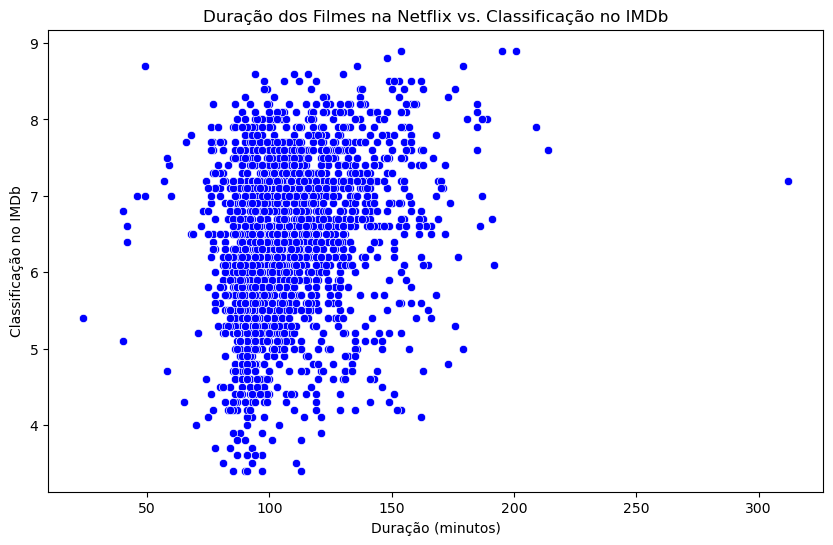

Correlação entre Duração e Classificação no IMDb: 0.28


In [3]:
# Merge Netflix e IMDb pelo título
merged_netflix_imdb = pd.merge(netflix_df, imdb_df, left_on="title", right_on="Movie", how="inner")

# Filtrar para filmes
movies_netflix = merged_netflix_imdb[merged_netflix_imdb['type'] == 'Movie'].copy()

# Remover o texto ' min' e converter a coluna 'duration' para numérica
movies_netflix['duration'] = movies_netflix['duration'].str.replace(' min', '', regex=False).astype(float)

# Converter a coluna 'Rating' para numérica
movies_netflix['Rating'] = movies_netflix['Rating'].astype(float)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_netflix['duration'], y=movies_netflix['Rating'], color='blue')
plt.title('Duração dos Filmes na Netflix vs. Classificação no IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Classificação no IMDb')
plt.show()

# Cálculo da correlação de Pearson
correlation, _ = pearsonr(movies_netflix['duration'], movies_netflix['Rating'])
print(f"Correlação entre Duração e Classificação no IMDb: {correlation:.2f}")


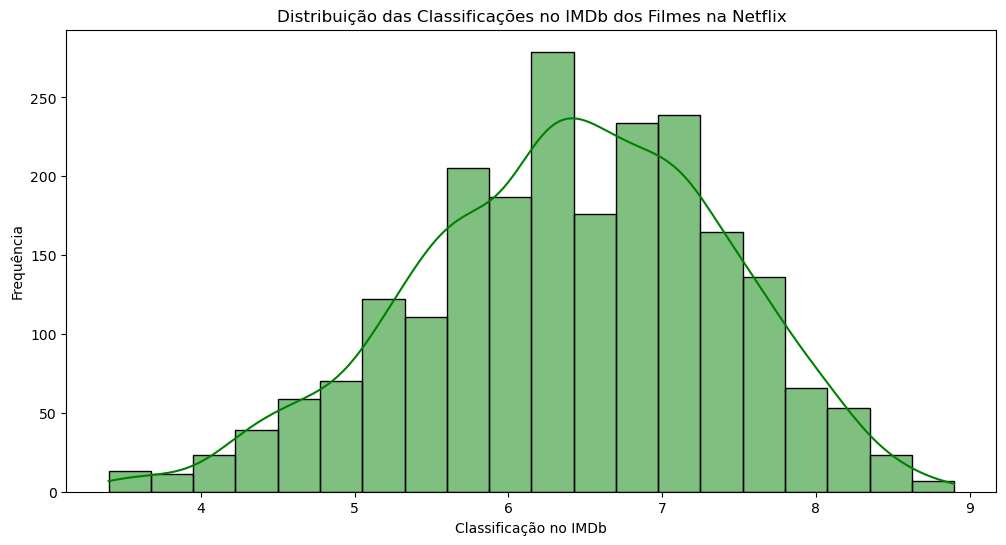

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(movies_netflix['Rating'], bins=20, kde=True, color='green')
plt.title('Distribuição das Classificações no IMDb dos Filmes na Netflix')
plt.xlabel('Classificação no IMDb')
plt.ylabel('Frequência')
plt.show()


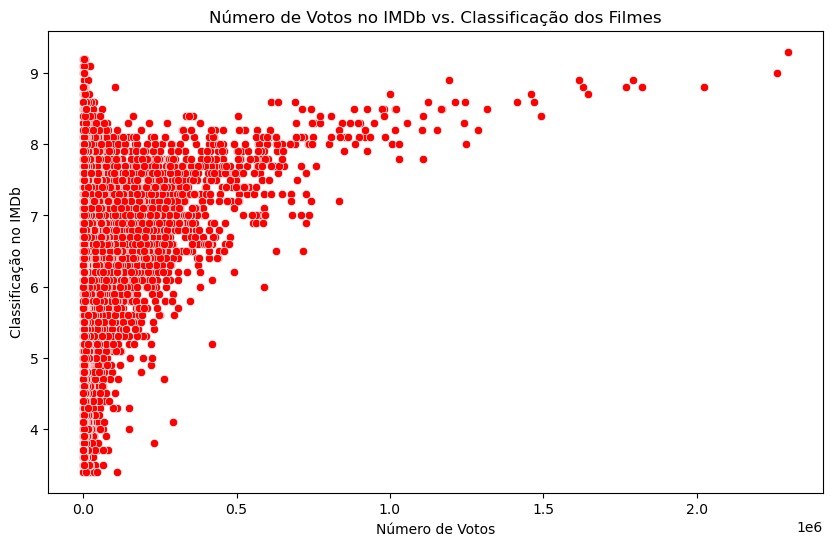

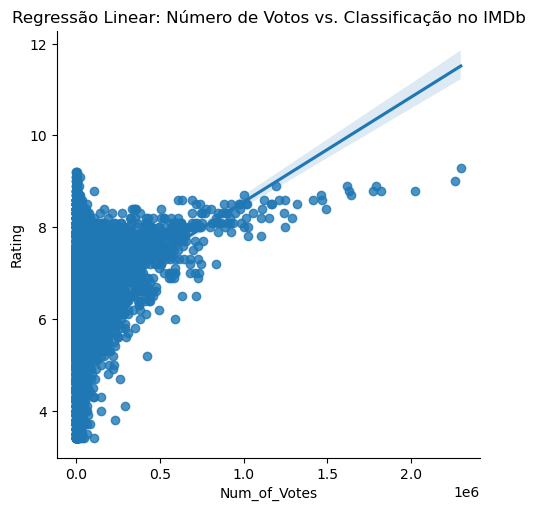

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=imdb_df['Num_of_Votes'], y=imdb_df['Rating'], color='red')
plt.title('Número de Votos no IMDb vs. Classificação dos Filmes')
plt.xlabel('Número de Votos')
plt.ylabel('Classificação no IMDb')
plt.show()

# Regressão Linear
sns.lmplot(x='Num_of_Votes', y='Rating', data=imdb_df)
plt.title('Regressão Linear: Número de Votos vs. Classificação no IMDb')
plt.show()

   duration
0      90.0
1       2.0
2       1.0
3       1.0
4       2.0


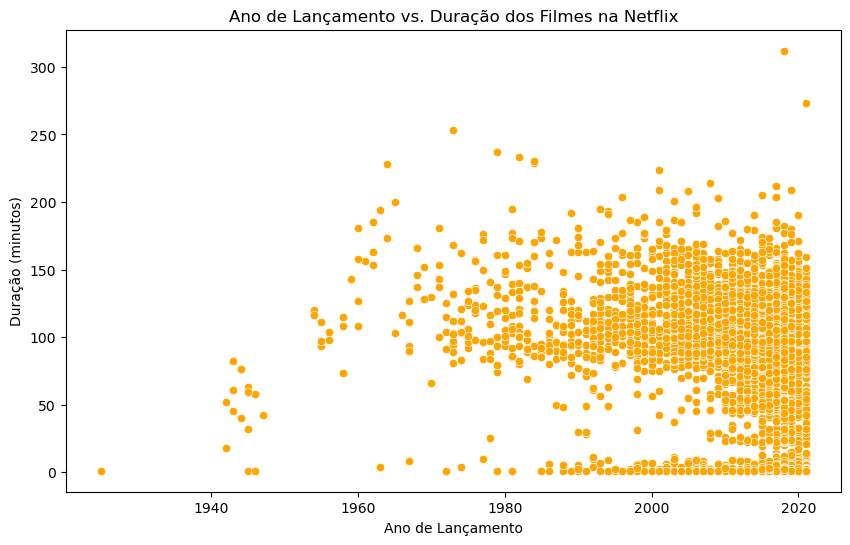

In [6]:
# Limpar e converter a coluna 'duration'
# Remover 'min', qualquer texto não numérico, e converter para float
netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

# Verificar se a conversão foi bem-sucedida e há dados válidos
print(netflix_df[['duration']].head())

# Verificar a existência de dados válidos
if not netflix_df['duration'].dropna().empty:
    # Gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=netflix_df['release_year'], y=netflix_df['duration'], color='orange')
    plt.title('Ano de Lançamento vs. Duração dos Filmes na Netflix')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Duração (minutos)')
    plt.show()
else:
    print("Não há dados válidos na coluna 'duration'.")

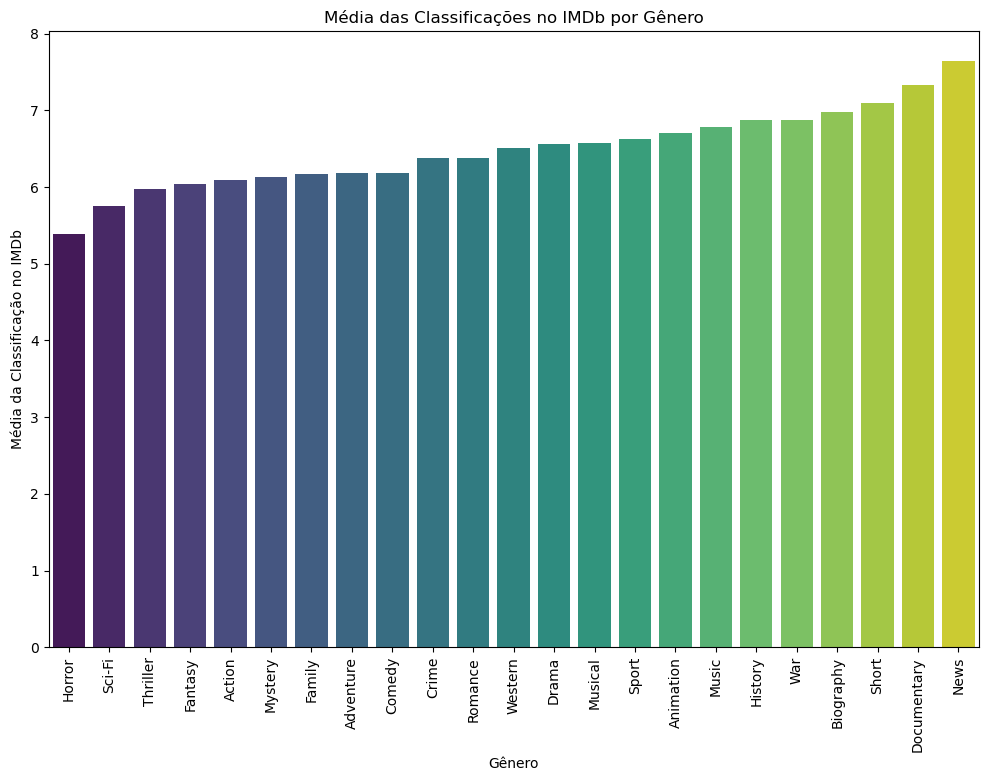

In [7]:
# Explodir a coluna de gêneros
imdb_df['Genres'] = imdb_df['Genres'].str.split(',')
imdb_df_exploded = imdb_df.explode('Genres')

# Média das classificações por gênero
genre_ratings = imdb_df_exploded.groupby('Genres')['Rating'].mean().sort_values()

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')
plt.title('Média das Classificações no IMDb por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média da Classificação no IMDb')
plt.xticks(rotation=90)
plt.show()

  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Light

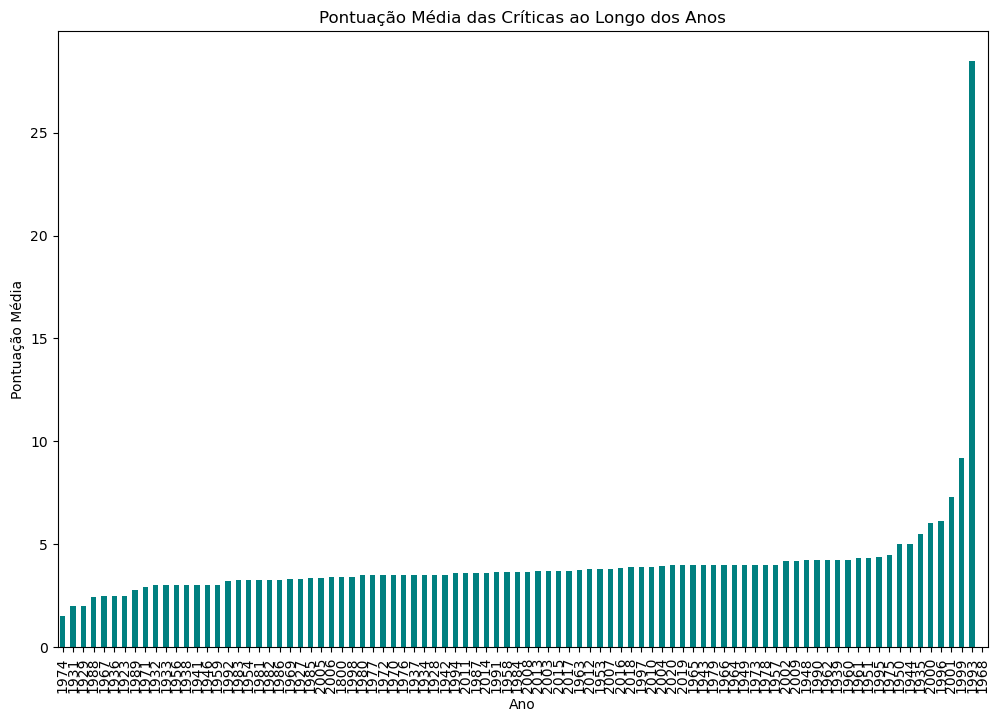

In [8]:
# Exibir amostra dos dados para inspeção
print(rt_df.head())

# Limpar e converter 'review_score' para float (caso não esteja em float)
# Remover textos como 'Fresh' e converter valores para float
rt_df['review_score'] = rt_df['review_score'].replace({'Fresh': None, 'Rotten': None, '': None})
rt_df['review_score'] = rt_df['review_score'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

# Verificar dados após limpeza
print(rt_df[['review_score']].head())

# Verificar a existência de dados válidos
if not rt_df['review_score'].dropna().empty:
    # Converter 'review_date' para datetime
    rt_df['review_date'] = pd.to_datetime(rt_df['review_date'], errors='coerce')

    # Agrupar por ano e calcular a média dos 'review_score'
    rt_df['year'] = rt_df['review_date'].dt.year
    review_scores_by_year = rt_df.groupby('year')['review_score'].mean().sort_values()

    # Gráfico
    plt.figure(figsize=(12, 8))
    review_scores_by_year.plot(kind='bar', color='teal')
    plt.title('Pontuação Média das Críticas ao Longo dos Anos')
    plt.xlabel('Ano')
    plt.ylabel('Pontuação Média')
    plt.show()
else:
    print("Não há dados válidos na coluna 'review_score'.")

                   title  duration platform
0   Dick Johnson Is Dead      90.0  Netflix
1          Blood & Water       2.0  Netflix
2              Ganglands       1.0  Netflix
3  Jailbirds New Orleans       1.0  Netflix
4           Kota Factory       2.0  Netflix


<Figure size 1200x600 with 0 Axes>

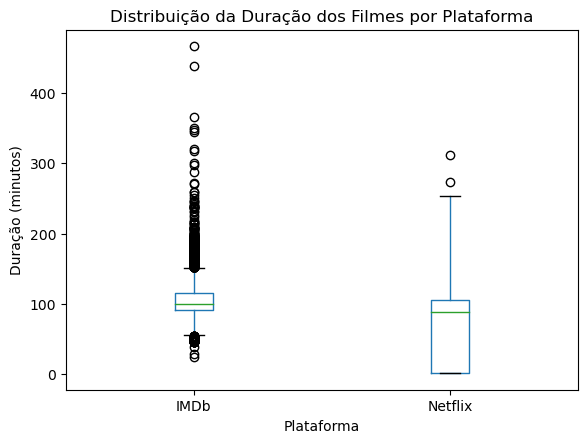

In [9]:
# Adicionar a coluna 'platform' para identificar a origem dos dados
netflix_df['platform'] = 'Netflix'
imdb_df['platform'] = 'IMDb'

# Renomear colunas para combinar
imdb_df = imdb_df.rename(columns={'Movie': 'title', 'Duration': 'duration'})

# Concatenar os DataFrames
combined_df = pd.concat([netflix_df[['title', 'duration', 'platform']], imdb_df[['title', 'duration', 'platform']]])

# Garantir que a coluna 'duration' seja do tipo string antes de aplicar operações de string
combined_df['duration'] = combined_df['duration'].astype(str)

# Limpar e converter a duração para numérico, removendo ' min' e outras anomalias
combined_df['duration'] = combined_df['duration'].str.replace(' min', '', regex=False)
combined_df['duration'] = combined_df['duration'].str.extract('(\d+)').astype(float)

# Verificar a limpeza dos dados
print(combined_df[['title', 'duration', 'platform']].head())

# Gráfico de boxplot da duração dos filmes por plataforma
plt.figure(figsize=(12, 6))
combined_df.boxplot(column='duration', by='platform', grid=False)
plt.title('Distribuição da Duração dos Filmes por Plataforma')
plt.suptitle('')  # Remove o título padrão criado pelo `boxplot`
plt.xlabel('Plataforma')
plt.ylabel('Duração (minutos)')
plt.show()

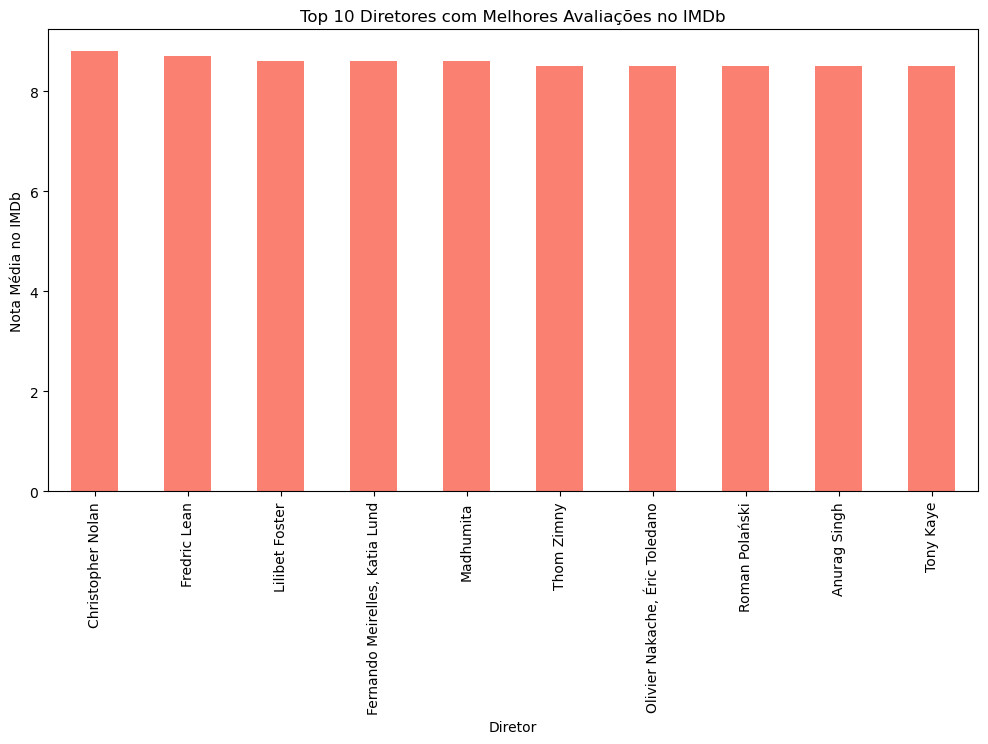

In [10]:
# Agrupar por diretor e calcular média das notas
director_ratings = merged_netflix_imdb.groupby('director')['Rating'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
director_ratings.plot(kind='bar', color='salmon')
plt.title('Top 10 Diretores com Melhores Avaliações no IMDb')
plt.xlabel('Diretor')
plt.ylabel('Nota Média no IMDb')
plt.show()

Colunas no IMDb DataFrame:
Index(['Movie', 'Year', 'Duration', 'Genres', 'Rating', 'Num_of_Votes',
       'Five_Year', 'Final_Genre', 'Types_of_Duration'],
      dtype='object')
Correlação entre Duração e Classificação IMDb: 0.27
Correlação entre Classificação Rotten Tomatoes e Duração: -0.00


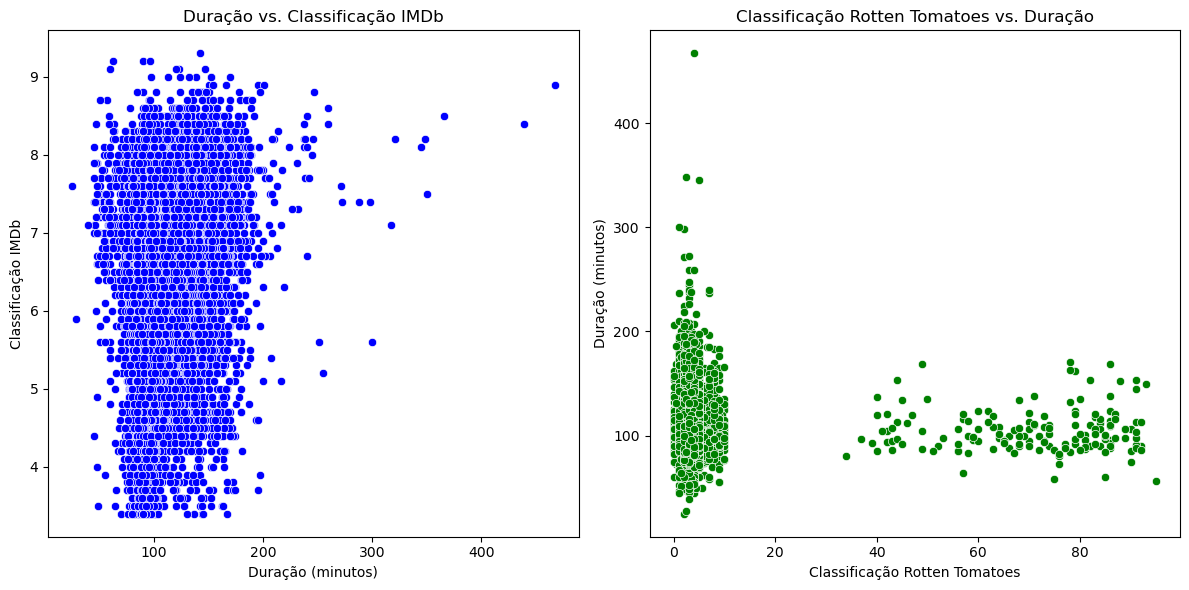

In [11]:
# Carregar os datasets
imdb_df = pd.read_csv(r'C:\Users\theno\Documents\Folder\final_imdb_dataset.csv')

# Verificar os nomes das colunas
print("Colunas no IMDb DataFrame:")
print(imdb_df.columns)

# Limpar e converter dados para análise
imdb_df['Duration'] = imdb_df['Duration'].astype(float)

# Gráficos e análise
plt.figure(figsize=(12, 6))

# Duração vs. Classificação IMDb
plt.subplot(1, 2, 1)
sns.scatterplot(x=imdb_df['Duration'], y=imdb_df['Rating'], color='blue')
plt.title('Duração vs. Classificação IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Classificação IMDb')

# Calcular correlação
imdb_corr = imdb_df[['Duration', 'Rating']].corr().iloc[0, 1]
print(f'Correlação entre Duração e Classificação IMDb: {imdb_corr:.2f}')

# Ajustar para Rotten Tomatoes
# Vamos supor que a duração esteja presente e seja comparável no Rotten Tomatoes

# Análise de correlação para Rotten Tomatoes
plt.subplot(1, 2, 2)
sns.scatterplot(x=rt_df['review_score'], y=imdb_df['Duration'].reindex(rt_df.index), color='green')
plt.title('Classificação Rotten Tomatoes vs. Duração')
plt.xlabel('Classificação Rotten Tomatoes')
plt.ylabel('Duração (minutos)')

# Calcular correlação
rt_corr = rt_df[['review_score']].join(imdb_df[['Duration']], how='inner').corr().iloc[0, 1]
print(f'Correlação entre Classificação Rotten Tomatoes e Duração: {rt_corr:.2f}')

plt.tight_layout()
plt.show()

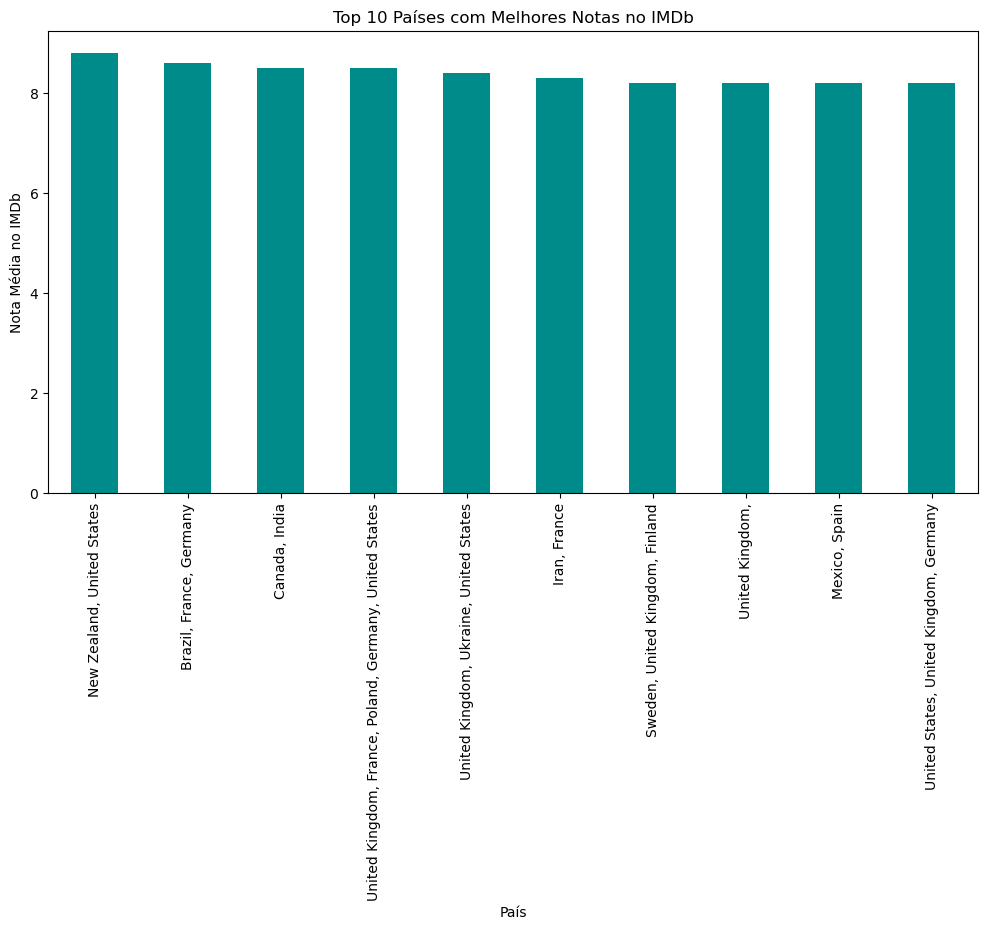

In [12]:
# Agrupar por país e calcular média das notas
country_ratings = merged_netflix_imdb.groupby('country')['Rating'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
country_ratings.plot(kind='bar', color='darkcyan')
plt.title('Top 10 Países com Melhores Notas no IMDb')
plt.xlabel('País')
plt.ylabel('Nota Média no IMDb')
plt.show()